 # MACHINE_LEARNING_PROJECT_2_BANK_MARKETING_DATA

<h3> Dataset Description </h3>
The data is related with direct marketing campaigns of a banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 
 
* __bank client attributes__:
    * age: age of client (numeric)   
    * job : type of job (categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services")   
    * marital : marital status (categorical: "married", "divorced", "single")  
    * education: client highest education (categorical: "unknown", "secondary", "primary", "tertiary")
    * default: has credit in default? (binary/2-categories: "yes", "no")
    * balance: average yearly balance, in euros (numeric)  
    * housing: has housing loan? (binary/2-categories: "yes", "no")  
    * loan: has personal loan? (binary/2-categories: "yes", "no")  
* __related with the last contact of the current campaign__:
    * contact: contact communication type (categorical: "unknown", "telephone", "cellular") 
    * day: last contact day of the month (numeric)
    * month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
    * duration: last contact duration, in seconds (numeric)
* __other attributes__:
    * campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    * pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
    * previous: number of contacts performed before this campaign and for this client (numeric)
    * poutcome: outcome of the previous marketing campaign ( categorical: 'unknown","other", "failure", "success")
* __Output variable (desired target)__:
    * y: has the client subscribed a term deposit? (binary: "yes", "no")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('bank.csv')
df

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


### Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values? 

In [4]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [5]:
df.pdays.median()

-1.0

- As we can observe above,there are values as -1 which doesnot conclude anything,because pdays basically means "is the number of days that passed by after the client was last contacted from a previous campaign",so in this -1 is bit out of fit.
- here mean = -1,minimum value=-1 and median =-1,which does not infer anything

In [6]:
df1 = df[df['pdays']>0]
df1

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,20000,single,secondary,yes,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45201,53,management,100000,married,tertiary,yes,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45204,73,retired,55000,married,secondary,yes,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [7]:
df1.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [8]:
df1.pdays.median()

194.0

- After selecting relevant values we can observe ,mean=224,minimum value =1 and median= 194

### Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median? 

In [9]:
df.groupby('education').median()['balance']

education
primary      403
secondary    392
tertiary     577
unknown      568
Name: balance, dtype: int64

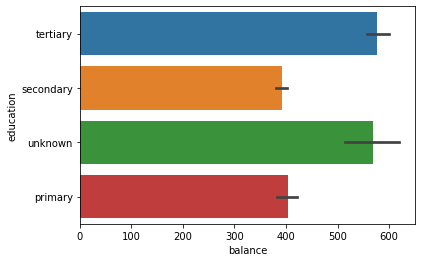

In [10]:
sns.barplot(x=df['balance'],y=df['education'],estimator=np.median)

- As we can observe.Tertiary education has higher median value under balances and next we have few values which are 
- unknown,which second highest median under balance

### Make a box plot for pdays. Do you see any outliers?

In [11]:
df1.pdays.value_counts()

182    167
92     147
91     126
183    126
181    117
      ... 
3        1
850      1
842      1
826      1
603      1
Name: pdays, Length: 558, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


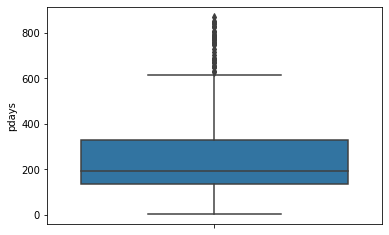

In [12]:
print(sns.boxplot(y=df1['pdays']))

- Above plot is by using pday with know values and ignoring missing values(-1)

AxesSubplot(0.125,0.125;0.775x0.755)


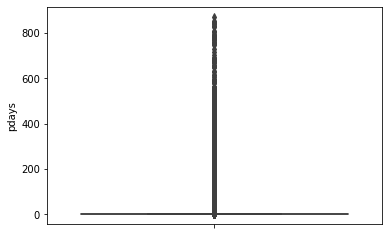

In [13]:
print(sns.boxplot(y=df['pdays']))

In [14]:
df.pdays.value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

- this plot is including missing values(-1),and we have see outliers in both kind of data,as we see above there are 36954 values missing (-1) for pdays in the data

### FINAL OBJECTIVE= To make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”. 

 - Performing bi-variate analysis to identify the features that are directly associated with the target variable before predicting 
 
- Converting the response variable to a dummy variable

In [15]:
df=pd.get_dummies(df,columns=['response'],drop_first=True)
df

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response_yes
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


### Plotting numerical features against categorical features’ 

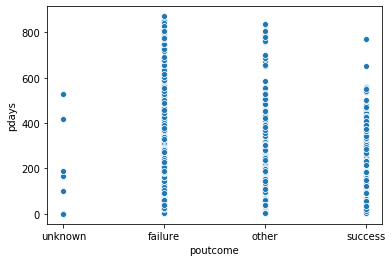

In [16]:
sns.scatterplot(x='poutcome',y='pdays',data=df)

In [17]:
df.head(2)

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response_yes
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0


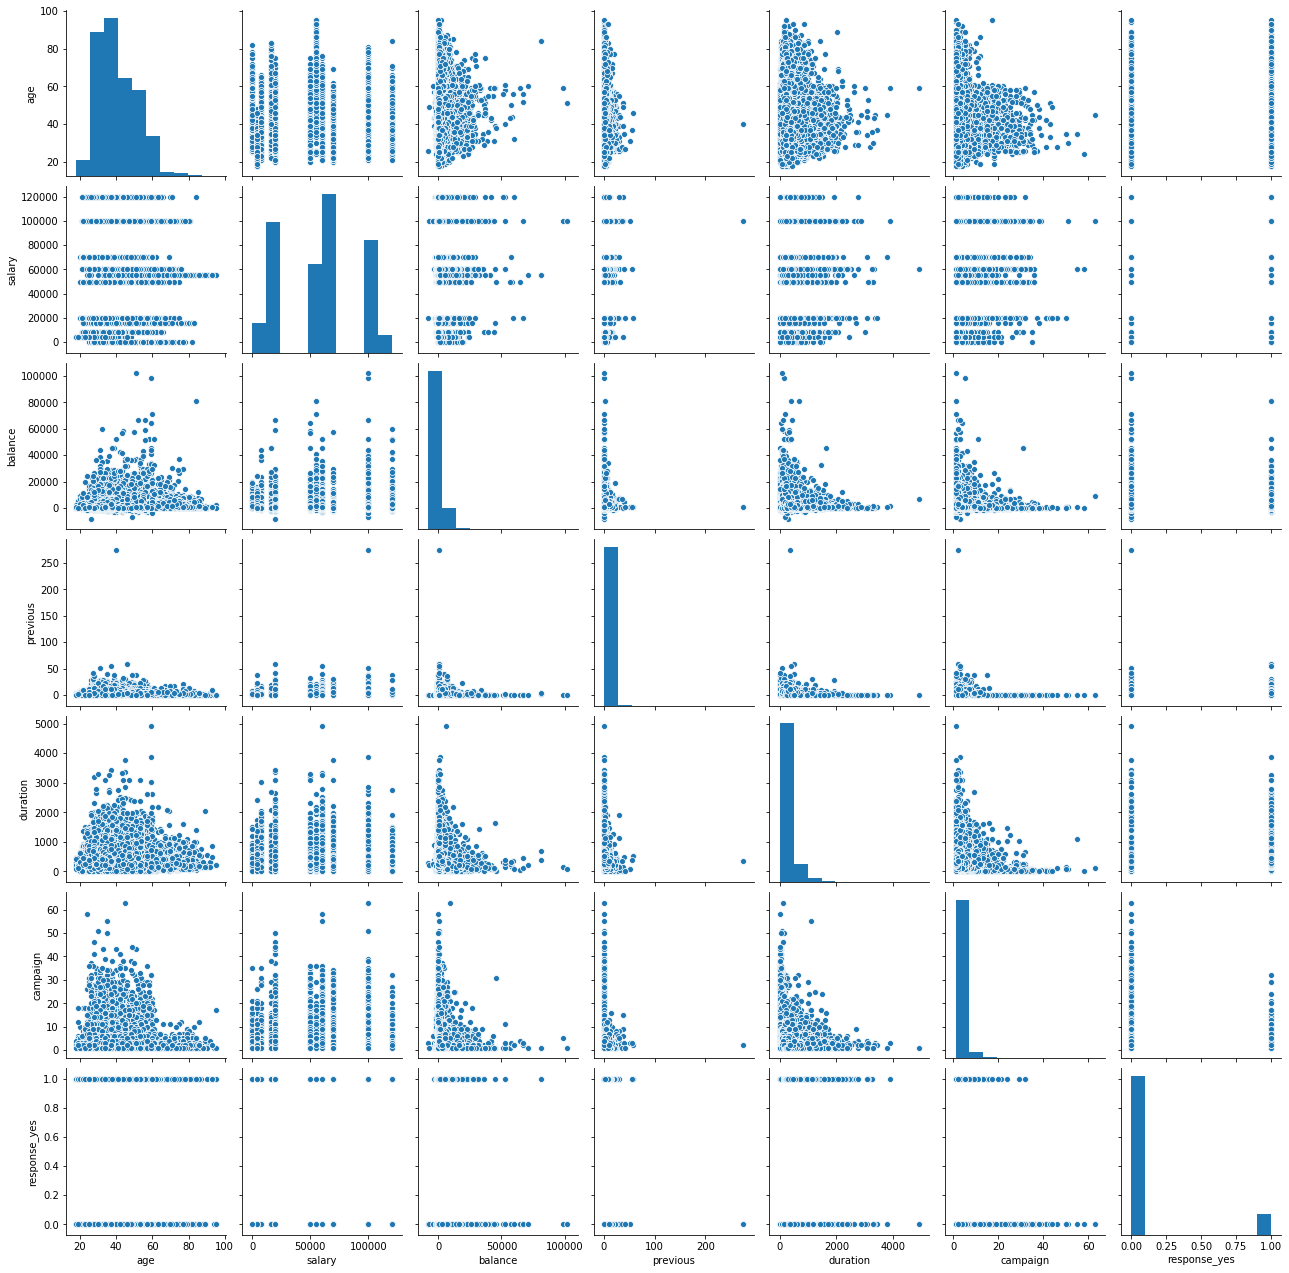

In [18]:
sns.pairplot(df[['age','salary','balance','previous','duration','campaign','response_yes']])

__Observation:__  
* Pair plots of age-campaign and day-campaign are much efficient in distinguishing between different classes with very few overlapes.

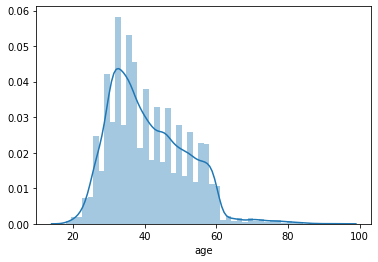

In [19]:
sns.distplot(df['age'],bins=50)

In [20]:
lst = [df]
for column in lst:
    column.loc[column["age"] < 30,  'age group'] = 30
    column.loc[(column["age"] >= 30) & (column["age"] <= 44), 'age group'] = 40
    column.loc[(column["age"] >= 45) & (column["age"] <= 59), 'age group'] = 50
    column.loc[column["age"] >= 60, 'age group'] = 60

In [21]:
agewise_response = pd.crosstab(df['response_yes'],df['age group']).apply(lambda x: x/x.sum() * 100)
agewise_response = agewise_response.transpose()

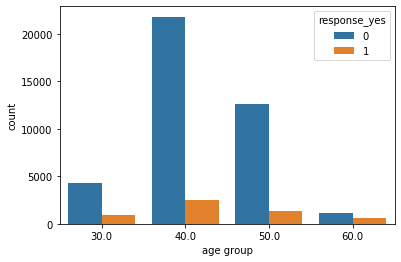

In [22]:
sns.countplot(x='age group', data=df, hue='response_yes')

In [23]:
print('Success rate and total people with different age groups contacted:')
print('People with age < 30 contacted: {}, Success rate: {}'.format(len(df[df['age group'] == 30]), df[df['age group'] == 30].response_yes.value_counts()[1]/len(df[df['age group'] == 30])))
print('People between 30 & 45 contacted: {}, Success rate: {}'.format(len(df[df['age group'] == 40]), df[df['age group'] == 40].response_yes.value_counts()[1]/len(df[df['age group'] == 40])))
print('People between 40 & 60 contacted: {}, Success rate: {}'.format(len(df[df['age group'] == 50]), df[df['age group'] == 50].response_yes.value_counts()[1]/len(df[df['age group'] == 50])))
print('People with 60+ age contacted: {}, Success rate: {}'.format(len(df[df['age group'] == 60]), df[df['age group'] == 60].response_yes.value_counts()[1]/len(df[df['age group'] == 60])))

Success rate and total people with different age groups contacted:
People with age < 30 contacted: 5273, Success rate: 0.1759908970225678
People between 30 & 45 contacted: 24274, Success rate: 0.10117821537447474
People between 40 & 60 contacted: 13880, Success rate: 0.09402017291066282
People with 60+ age contacted: 1784, Success rate: 0.336322869955157


__Observation:__  
* People with age < 30 or 60+ have higher success rate.  
* Only 3% of people with age of 60+ 

### With respect to JOB field

Text(0.5, 1.0, 'Response recieved with respect to JOB')

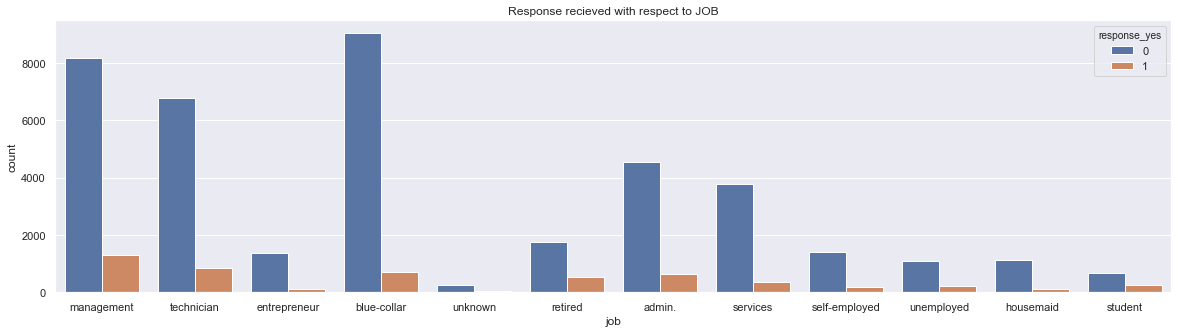

In [24]:
sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(x=df['job'], data=df, hue=df['response_yes'])
plt.title('Response recieved with respect to JOB')


- Now lets create a table to count number of people in different job role and response of succes rate

In [25]:
from prettytable import PrettyTable

In [26]:
counts = PrettyTable(['Job', 'Total Clients', 'Success rate'])
counts.add_row(['Blue-collar', len(df[df['job'] == 'blue-collar']), df[df['job'] == 'blue-collar'].response_yes.value_counts()[1]/len(df[df['job'] == 'blue-collar'])])
counts.add_row(['Management', len(df[df['job'] == 'management']), df[df['job'] == 'management'].response_yes.value_counts()[1]/len(df[df['job'] == 'management'])])
counts.add_row(['Technician', len(df[df['job'] == 'technician']), df[df['job'] == 'technician'].response_yes.value_counts()[1]/len(df[df['job'] == 'technician'])])
counts.add_row(['Admin', len(df[df['job'] == 'admin.']), df[df['job'] == 'admin.'].response_yes.value_counts()[1]/len(df[df['job'] == 'admin.'])])
counts.add_row(['Services', len(df[df['job'] == 'services']), df[df['job'] == 'services'].response_yes.value_counts()[1]/len(df[df['job'] == 'services'])])
counts.add_row(['Retired', len(df[df['job'] == 'retired']), df[df['job'] == 'retired'].response_yes.value_counts()[1]/len(df[df['job'] == 'retired'])])
counts.add_row(['Self-employed', len(df[df['job'] == 'self-employed']), df[df['job'] == 'self-employed'].response_yes.value_counts()[1]/len(df[df['job'] == 'self-employed'])])
counts.add_row(['Entrepreneur', len(df[df['job'] == 'entrepreneur']), df[df['job'] == 'entrepreneur'].response_yes.value_counts()[1]/len(df[df['job'] == 'entrepreneur'])])
counts.add_row(['Unemployed', len(df[df['job'] == 'unemployed']), df[df['job'] == 'unemployed'].response_yes.value_counts()[1]/len(df[df['job'] == 'unemployed'])])
counts.add_row(['Housemaid', len(df[df['job'] == 'housemaid']), df[df['job'] == 'housemaid'].response_yes.value_counts()[1]/len(df[df['job'] == 'housemaid'])])
counts.add_row(['Student', len(df[df['job'] == 'student']), df[df['job'] == 'student'].response_yes.value_counts()[1]/len(df[df['job'] == 'student'])])
counts.add_row(['Unknown', len(df[df['job'] == 'unknown']), df[df['job'] == 'unknown'].response_yes.value_counts()[1]/len(df[df['job'] == 'unknown'])])
print(counts)

+---------------+---------------+---------------------+
|      Job      | Total Clients |     Success rate    |
+---------------+---------------+---------------------+
|  Blue-collar  |      9732     | 0.07274969173859433 |
|   Management  |      9458     | 0.13755550856417847 |
|   Technician  |      7597     | 0.11056996182703699 |
|     Admin     |      5171     | 0.12202668729452718 |
|    Services   |      4154     | 0.08883004333172845 |
|    Retired    |      2264     | 0.22791519434628976 |
| Self-employed |      1579     | 0.11842938568714376 |
|  Entrepreneur |      1487     | 0.08271687962340282 |
|   Unemployed  |      1303     | 0.15502686108979277 |
|   Housemaid   |      1240     | 0.08790322580645162 |
|    Student    |      938      |  0.2867803837953092 |
|    Unknown    |      288      | 0.11805555555555555 |
+---------------+---------------+---------------------+


__Observation:__  
* Top contacted people are from job type: 'blue-collar', 'management' & 'technician'
* Success rate is highest for student

### Poutcome against Response

Text(0.5, 1.0, 'Count Plot of poutcome for target variable')

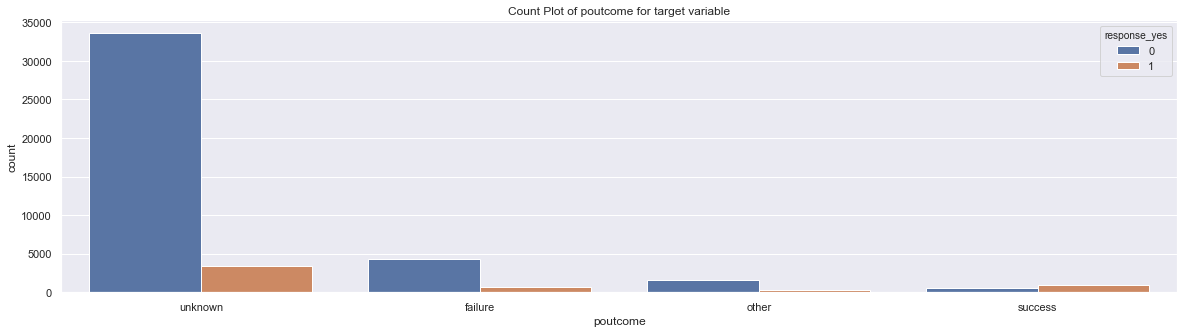

In [27]:
sns.countplot(x=df['poutcome'], data=df, hue=df['response_yes'])
plt.title('Count Plot of poutcome for target variable')

__Observation:__
* Most of the clients contacted have previous outcome as 'unknown'.

### Salary

Text(0.5, 1.0, 'Salary wise and response')

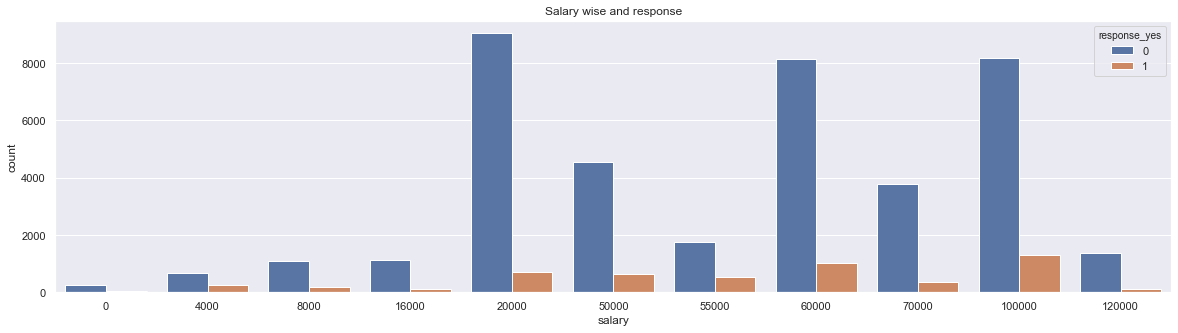

In [28]:
sns.countplot(x=df['salary'], data=df, hue=df['response_yes'])
plt.title('Salary wise and response')

__Observation:__
* Contacted people were with salary rane betwen 20000 to 100000
* Successn was the people having salary of 100000

###  Education Analysis

Text(0.5, 1.0, 'Respinse received based on education')

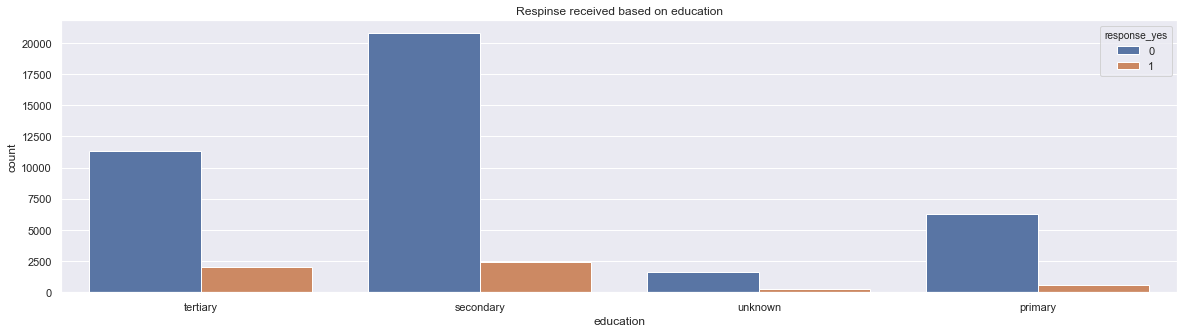

In [29]:
sns.countplot(x=df['education'], data=df, hue=df['response_yes'])
plt.title('Respinse received based on education')

In [30]:
df.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

__Observation:__
* Most of the people who are contacted have tertiary or secondary education.

Text(0.5, 1.0, 'Response received against defaulters')

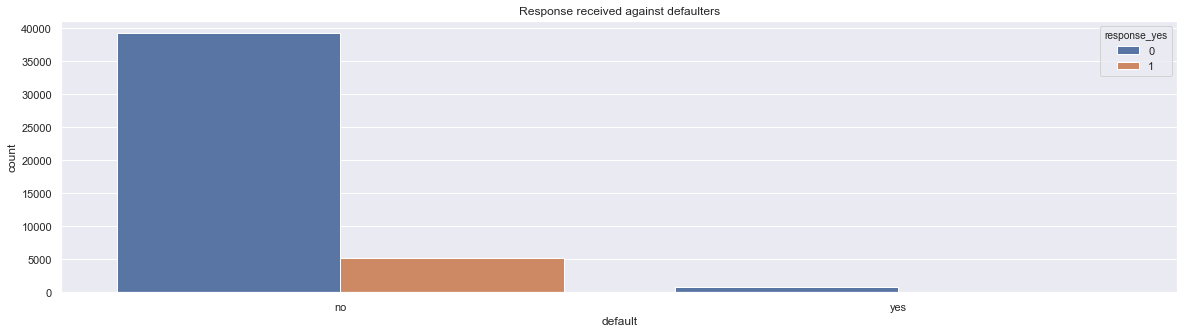

In [31]:
sns.countplot(x=df['default'], data=df, hue=df['response_yes'])
plt.title('Response received against defaulters')

In [32]:
df.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [33]:
df[df['default']=='yes'].response_yes.count()

815

#### As we can observe above,Very few people are contacted who are defaulter,

### Loan

Text(0.5, 1.0, 'Count plot of loan for target variable y')

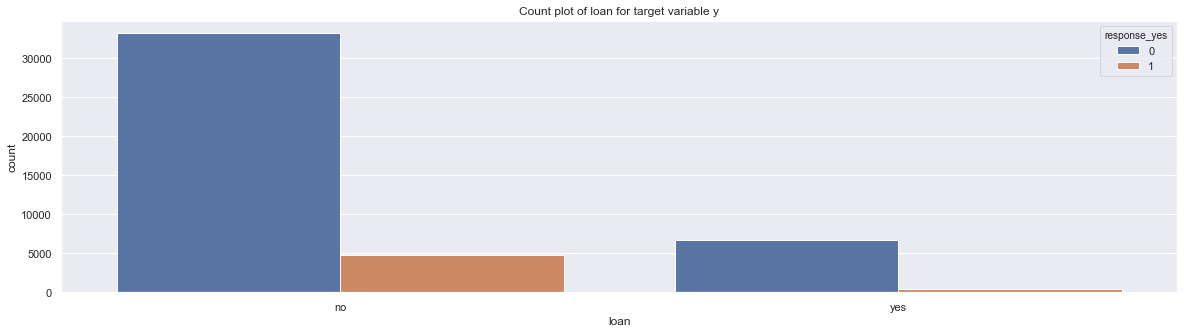

In [34]:
sns.countplot(x=df['loan'], data=df, hue=df['response_yes'])
plt.title('Count plot of loan for target variable y')

__Observation:__  
* As we observe aboe, less people are contacted who have loan.

### Contacts-Mode of communications

Text(0.5, 1.0, 'Modes of Communication:')

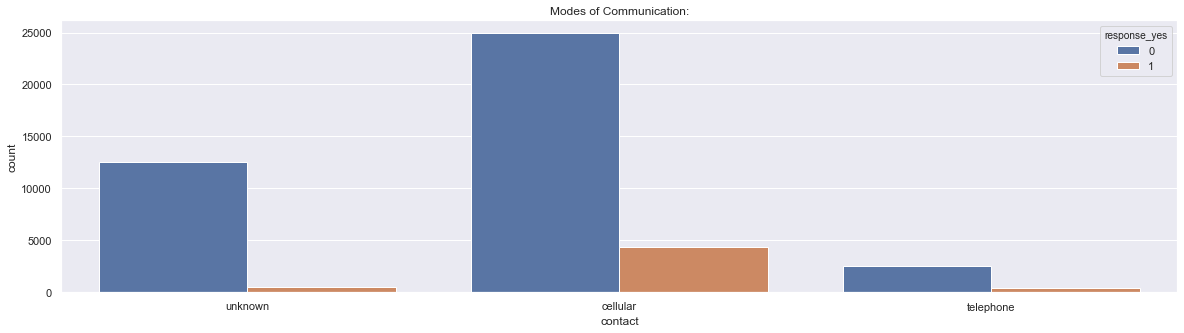

In [35]:
sns.countplot(x=df['contact'], data=df, hue=df['response_yes'])
plt.title('Modes of Communication:')

In [36]:
df.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

__Observation:__  
* As we observe above, most of the communication was made through 'cellular' network

### Month 

Text(0.5, 1.0, 'MOnth wise communication and response')

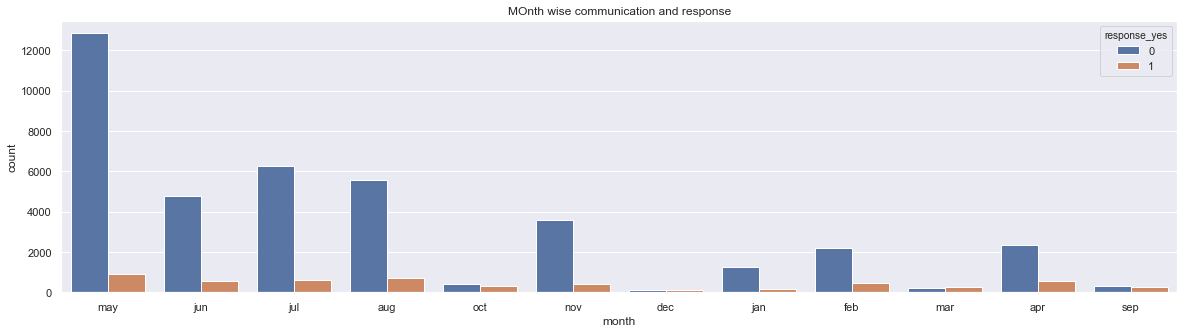

In [37]:
sns.countplot(x=df['month'], data=df, hue=df['response_yes'])
plt.title('MOnth wise communication and response')

__Observation:__
* Most of the people are contacted in the month of May
* Decemeber is the month less people are contacted

In [38]:
df.head(1)

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response_yes,age group
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,50.0


In [39]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical = [x for x in df.columns.to_list() if x not in categorical]
numerical.remove('response_yes')
numerical.remove('age group')

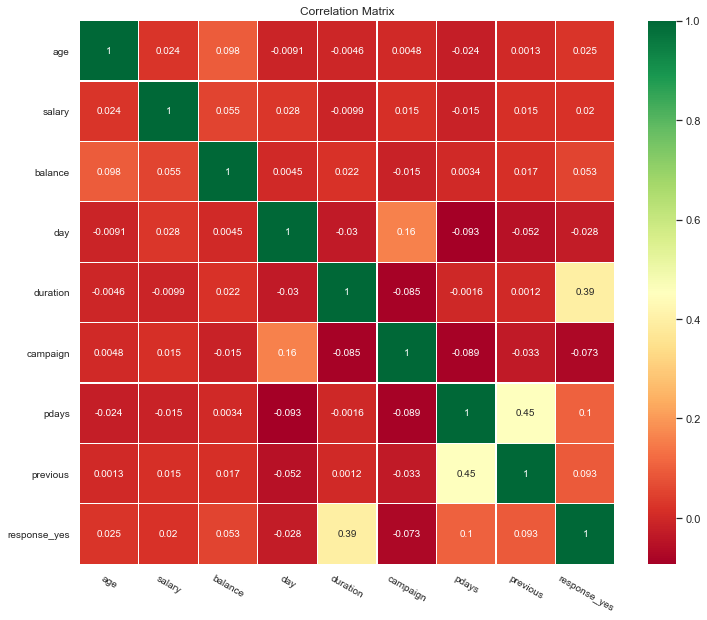

In [40]:
corr_data = df[numerical + ['response_yes']]
corr = corr_data.corr()
plt.close()
cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

### Are the features about the previous campaign data useful? 

- As we can observe in above correlatiion matrix,previous cmapaign data is not much correlated,and have only 0.093 almost close 0 .so previous data cannot be used to prediict much

__Other important Observations:__  
* pdays and previous have higher correlation
* duration have a higher correlation with our target variable
* Numerical features have very less correlation between them.

### Are pdays and poutcome associated with the target? 

In [41]:
pd.crosstab(df['pdays'],df['poutcome'])

poutcome,failure,other,success,unknown
pdays,,,,
-1,0,0,0,36954
1,3,3,9,0
2,1,35,1,0
3,0,1,0,0
4,1,0,1,0
...,...,...,...,...
838,0,1,0,0
842,1,0,0,0
850,1,0,0,0


In [42]:
pd.crosstab(df['pdays'],df['poutcome'],values=df['response_yes'],aggfunc='count',margins=True,normalize=True)

poutcome,failure,other,success,unknown,All
pdays,,,,,
-1,0.000000,0.000000,0.000000,0.817367,0.817367
1,0.000066,0.000066,0.000199,0.000000,0.000332
2,0.000022,0.000774,0.000022,0.000000,0.000818
3,0.000000,0.000022,0.000000,0.000000,0.000022
4,0.000022,0.000000,0.000022,0.000000,0.000044
...,...,...,...,...,...
842,0.000022,0.000000,0.000000,0.000000,0.000022
850,0.000022,0.000000,0.000000,0.000000,0.000022
854,0.000022,0.000000,0.000000,0.000000,0.000022


In [43]:
pd.crosstab(df['pdays'],df['previous'],values=df['response_yes'],aggfunc='count',margins=True,normalize=True)

previous,0,1,2,3,4,5,6,7,8,9,...,35,37,38,40,41,51,55,58,275,All
pdays,,,,,,,,,,,,,,,,,,,,,
-1,0.817367,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817367
1,0.000000,0.000111,0.000022,0.000044,0.000000,0.000022,0.000044,0.000066,0.000022,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000332
2,0.000000,0.000310,0.000177,0.000155,0.000022,0.000088,0.000022,0.000022,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000818
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000022
4,0.000000,0.000044,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000022
850,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000022
854,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000022


__Observations:__  
* pdays and poutcome are associated with each other
* From previous marketing campaign ,we can see that there was a outcome ,when there are more contacts made to a particular client
* pdays=-1 has overall count of 36954 same as previous=0 ,,which implies that many of people were not contacted.


### Inference:-- So to proceed further, we can just retain pdays value,as we can say,in previous campaign the clients were not contact for so many people ,so the previous value is 0 for all those 36954 contacts

### - Necessary transformations of categorical variables and the numeric variables
### -Handling variables corresponding to the previous campaign

- __(We will be converting previous marketing campaigns variables into dummy variables)__

In [44]:
df=pd.get_dummies(df,drop_first=True)
df

,age,salary,balance,day,duration,campaign,pdays,previous,response_yes,age group,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,100000,2143,5,261,1,-1,0,0,50.0,...,0,0,0,1,0,0,0,0,0,1
1,44,60000,29,5,151,1,-1,0,0,40.0,...,0,0,0,1,0,0,0,0,0,1
2,33,120000,2,5,76,1,-1,0,0,40.0,...,0,0,0,1,0,0,0,0,0,1
3,47,20000,1506,5,92,1,-1,0,0,50.0,...,0,0,0,1,0,0,0,0,0,1
4,33,0,1,5,198,1,-1,0,0,40.0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,60000,825,17,977,3,-1,0,1,50.0,...,0,0,0,0,1,0,0,0,0,1
45207,71,55000,1729,17,456,2,-1,0,1,60.0,...,0,0,0,0,1,0,0,0,0,1
45208,72,55000,5715,17,1127,5,184,3,1,60.0,...,0,0,0,0,1,0,0,0,1,0
45209,57,20000,668,17,508,4,-1,0,0,50.0,...,0,0,0,0,1,0,0,0,0,1


In [45]:
df.columns

Index(['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'response_yes', 'age group', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'targeted_yes', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

## Train test split

In [46]:
X=df.drop('response_yes', axis=1)
Y=df['response_yes']


## Predictive model 1: Logistic regression 

__1.Before we build a model,lets select top features using RFE(recursive feature elimination),so that model predicts better__

- __ FInding RFE to select top n features in an automated fashion (choose n as you see fit__

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [48]:
logm=LogisticRegression()

In [49]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm 

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
# 30% of the data will be used for testing
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.3, random_state=0)

In [52]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
logm.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
rfe = RFE(logm, 10)
rfe = rfe.fit(X_train, Y_train)
rfe_ = X_train.columns[rfe.support_]
rfe_

Index(['housing_yes', 'contact_unknown', 'month_aug', 'month_dec', 'month_jan',
       'month_jul', 'month_mar', 'month_oct', 'month_sep', 'poutcome_success'],
      dtype='object')

__We will check VIF(Variance Inflation factor to delete the redundant factor___

In [55]:
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [58]:
X_new_train=X_train[rfe_]

In [59]:
checkVIF(X_new_train)

,Features,VIF
3,month_dec,1.01
7,month_oct,0.50
8,month_sep,0.36
6,month_mar,0.26
4,month_jan,0.23
5,month_jul,0.05
9,poutcome_success,0.03
0,housing_yes,0.02
1,contact_unknown,0.02
2,month_aug,0.00


** As we can observe above,Month of dec has highest VIF value, we will rmeove that feature

-- So we will consdier the rest of the features for building our model

In [60]:
X_new=df[['housing_yes', 'contact_unknown','month_aug','month_jan',
       'month_jul', 'month_mar', 'month_oct', 'month_sep', 'poutcome_success']]
Y=df['response_yes']

In [61]:
X_new_train, X_new_test, Y_train, Y_test= train_test_split(X_new, Y, test_size=0.3, random_state=0)

In [62]:
z=logm.fit(X_new_train,Y_train)
z

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Estimate the model performance using k fold cross validation

In [63]:
auc=[X_train,X_new_train]
models = []
models.append(('LogisticRegression', LogisticRegression()))
for i in auc:
        kfold = KFold(n_splits=10, random_state=0)    
        # train the model
        cv_results = cross_val_score(LogisticRegression(), i, Y_train, cv=kfold, scoring='accuracy')    
        msg = "%s: %f (%f)" % (LogisticRegression, cv_results.mean(), cv_results.std())
        print(msg)

<class 'sklearn.linear_model._logistic.LogisticRegression'>: 0.889374 (0.003253)
<class 'sklearn.linear_model._logistic.LogisticRegression'>: 0.893007 (0.003134)


### By using the features we got from VIF and Kfold ,we have got an accuracy of 89%.

In [64]:
Y_pred=z.predict(X_new_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [65]:
Y_pred.shape

(13564,)

In [66]:
# Classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [67]:
print(confusion_matrix(Y_test,Y_pred))

[[11756   213]
 [ 1281   314]]


### Precision, recall, accuracy of your model

In [68]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.60      0.20      0.30      1595

    accuracy                           0.89     13564
   macro avg       0.75      0.59      0.62     13564
weighted avg       0.87      0.89      0.86     13564



### Which features are the most important from your model? 

__The most important features are as follows__
 * Month,housing,poutcome,contact

## Predictive model 2: Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


In [70]:
rfc = RandomForestClassifier(n_estimators=30,max_depth=30)
rfc.fit(X_train, Y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
y_pred=rfc.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=uint8)

In [72]:
print(confusion_matrix(Y_test,y_pred))


[[11614   355]
 [  993   602]]


In [73]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11969
           1       0.63      0.38      0.47      1595

    accuracy                           0.90     13564
   macro avg       0.78      0.67      0.71     13564
weighted avg       0.89      0.90      0.89     13564



### Estimating the model performance using k fold cross validation

In [74]:
p=[X_train,X_new_train]

In [75]:
for i in p:
    kf = KFold(n_splits=10)    
    cross_v = cross_val_score(RandomForestClassifier(), i, Y_train, cv=kfold, scoring='accuracy')  
    print('Cross validation score:',cross_v.mean())

Cross validation score: 0.9058997449585883
Cross validation score: 0.8937339001364082


__As we can observe above__
- CV score(for all features): 0.9043196330140578
- CV score(for selected features):  0.8933231392793823

In [76]:
model_new = RandomForestClassifier(n_estimators=45,max_depth=10)
model_new.fit(X_new_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=45,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [77]:
y1_pred=model_new.predict(X_new_test)
y1_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [79]:
print('For all features')
print(accuracy_score(Y_test, y1_pred))
print('For selected features')
print(accuracy_score(Y_test, y1_pred))

For all features
0.8911825420230021
For selected features
0.8911825420230021


In [80]:
print(classification_report(Y_test, y1_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11969
           1       0.63      0.18      0.28      1595

    accuracy                           0.89     13564
   macro avg       0.77      0.58      0.61     13564
weighted avg       0.87      0.89      0.86     13564



In [81]:
print(confusion_matrix(Y_test,y1_pred))

[[11805   164]
 [ 1312   283]]


### Which metric did you choose and why? 

We used classification performance metrics such as, Precision score,accuracy score , recall score and Cross val score etc.
In order to estimate the error, the model is required to test a dataset which it hasn’t seen yet.

Therefore for the purpose of testing the model, we would require a labelled dataset. This can be achieved by splitting the training dataset into training dataset and testing dataset. This can be achieved by various techniques such as, k-fold cross validation,

### Which model has better performance on the test set? 

Logistic has got better accuracy score compared to random forset, hence we can say that it has better performance,is an important model as it results in high AUC score.